In [1]:
import xarray
import matplotlib.pyplot as mp
import cartopy
import numpy
import glob
import gdal
import matplotlib.colors
import matplotlib.cm

In [2]:
file_dir = '/Users/baird/Dropbox/_data_observations/CALIPSO/'
#file_dir = '/beegfs/DATA/pritchard/blangenb/CALIPSO_DATA/'

In [3]:
file_list = sorted(glob.glob(file_dir+'/*.hdf'))

In [4]:
file_list

['/Users/baird/Dropbox/_data_observations/CALIPSO/CAL_LID_L2_01kmCLay-Standard-V4-10.2018-05-31T17-55-21ZN.hdf',
 '/Users/baird/Dropbox/_data_observations/CALIPSO/CAL_LID_L2_05kmCPro-Standard-V4-10.2018-05-31T17-55-21ZN.hdf']

In [5]:
# ===== open file, pull out specific data set
gdal_file = gdal.Open(file_list[1])
gdal_subdatasets = gdal_file.GetSubDatasets()
gdal_clf_ds = gdal.Open(gdal_subdatasets[31][0]) # cloud fraction
gdal_tbc_ds = gdal.Open(gdal_subdatasets[35][0]) # total backscatter

In [6]:
gdal_clf_data = gdal_clf_ds.ReadAsArray()
gdal_tbc_data = gdal_tbc_ds.ReadAsArray()

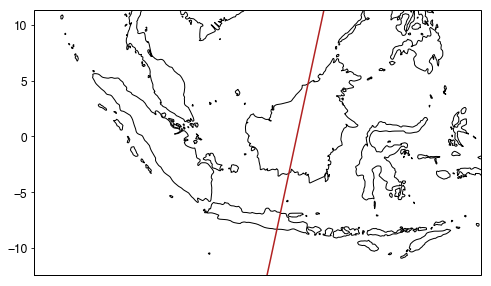

In [7]:
ds = xarray.open_dataset(file_list[1])

lat = ds['Latitude'].sel(fakeDim3=0).values
lon = ds['Longitude'].sel(fakeDim5=0).values


#####
fontsize=12
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([90,130,-12,11])
#ax.set_extent([50,180,-70,70])
ax.coastlines(resolution='50m')

ax.plot(lon,lat,c='firebrick')

ax.set_yticks([-10,-5,0,5,10])
ax.tick_params(labelsize=fontsize)

In [8]:
cod_data = ds['Column_Optical_Depth_Cloud_532'].values
ec_data = ds['Extinction_Coefficient_532'].values
rh_data = ds['Relative_Humidity'].values
p_data = ds['Pressure'].values
igbp_data = ds['IGBP_Surface_Type'].values
clf_data = ds['Cloud_Layer_Fraction'].values
avd_data = ds['Atmospheric_Volume_Description'].values
tbc_data = ds['Total_Backscatter_Coefficient_532'].values
ciab_data = ds['Column_Integrated_Attenuated_Backscatter_532'].values
iwc_data = ds['Ice_Water_Content_Profile'].values

In [9]:
step = 1e-4
one = numpy.arange(1e-4,1e-3+step,step)

step = 0.5e-3
two = numpy.arange(1e-3,8e-3+step,step)

step = 1e-2
three = numpy.arange(1e-2,1e-1+step,step)

bounds = list(numpy.concatenate((one,two,three)))

In [10]:
cmap = matplotlib.cm.gist_ncar
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

In [73]:
#colorvaluesforcolorbar
color_bar=[130,113,113,64,57,50,43,36,29,128,144,7,7,193,192,191,190,188,155,139,123,10,11,12,13,14,15,16,17,18,19,20,21,22,49]
color_bar=numpy.array(color_bar)+1
ints=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,1.0]
mult_fact=1e-5;

color_bar_labels=numpy.zeros(len(ints));
for i in range(len(ints)):
    if ints[i]==1.0:
        mult_fact=mult_fact*10
    color_bar_labels[i]=ints[i]*mult_fact

#createcolors_532.colors_532isusedtocreatethelidarcolorimage.
colors_plot=[130,113,64,57,50,43,36,29,128,144,7,7,193,192,191,190,188,155,139,123,10,11,12,13,14,15,16,17,18,19,20,21,22,49]
colors_plot=numpy.array(colors_plot)+1
replicates=[1,2,1,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,20,100,100,100,100,100,100,100,100,100,1]

colors_532=numpy.ones((1001))*49
ncols=len(colors_plot)
ic=0 #counterforcolors_532
ip=0 #counterforcolors_plot
for im in range(ncols):
    iend=ic+replicates[im]-1
    colors_532[ic:iend]=colors_plot[ip]
    ip=ip+1
    ic=iend+1

In [74]:
red_c=[0.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,\
0.0,42.5,85.0,127.5,170.0,212.5,255.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,\
0.0,42.5,85.0,127.5,170.0,212.5,255.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,\
0.0,42.5,85.0,127.5,170.0,212.5,255.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,\
0.0,42.5,85.0,127.5,170.0,212.5,255.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,\
0.0,42.5,85.0,127.5,170.0,212.5,255.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,\
0.0,42.5,85.0,127.5,170.0,212.5,255.0,\
0.0,0.0,0.0,0.0,0.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,255.0,255.0,255.0,255.0,255.0,\
0.0,0.0,0.0,0.0,0.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,255.0,255.0,255.0,255.0,255.0,\
0.0,0.0,0.0,0.0,0.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,255.0,255.0,255.0,255.0,255.0,\
0.0,0.0,0.0,0.0,0.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,255.0,255.0,255.0,255.0,255.0,\
0.0,0.0,0.0,0.0,0.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,255.0,255.0,255.0,255.0,255.0,\
0.0,0.0,0.0,0.0,0.0,0.0,42.5,85.0,127.5,170.0,212.5,255.0,255.0,255.0,255.0,255.0,255.0,\
42.5,85.0,127.5,170.0,212.5,42.5,85.0,127.5,170.0,212.5,\
42.5,85.0,127.5,170.0,212.5,42.5,85.0,127.5,170.0,212.5,42.5,85.0,127.5,170.0,212.5]

green_c=[0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,\
255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,\
255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,\
255.0,255.0,255.0,255.0,255.0,255.0,255.0,212.5,212.5,212.5,212.5,212.5,212.5,212.5,\
170.0,170.0,170.0,170.0,170.0,170.0,170.0,127.5,127.5,127.5,127.5,127.5,127.5,127.5,\
85.0,85.0,85.0,85.0,85.0,85.0,85.0,42.5,42.5,42.5,42.5,42.5,42.5,42.5,\
0.0,0.0,0.0,0.0,0.0,0.0,0.0,\
212.5,170.0,127.5,85.0,42.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.5,85.0,127.5,170.0,212.5,\
212.5,170.0,127.5,85.0,42.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.5,85.0,127.5,170.0,212.5,\
212.5,170.0,127.5,85.0,42.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.5,85.0,127.5,170.0,212.5,\
212.5,170.0,127.5,85.0,42.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.5,85.0,127.5,170.0,212.5,\
212.5,170.0,127.5,85.0,42.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.5,85.0,127.5,170.0,212.5,\
212.5,170.0,127.5,85.0,42.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.5,85.0,127.5,170.0,212.5,\
42.5,42.5,42.5,42.5,42.5,85.0,85.0,85.0,85.0,85.0,\
127.5,127.5,127.5,127.5,127.5,170.0,170.0,170.0,170.0,170.0,212.5,212.5,212.5,212.5,212.5]

blue_c=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.5,42.5,42.5,42.5,42.5,42.5,42.5,\
85.0,85.0,85.0,85.0,85.0,85.0,85.0,127.5,127.5,127.5,127.5,127.5,127.5,127.5,\
170.0,170.0,170.0,170.0,170.0,170.0,170.0,212.5,212.5,212.5,212.5,212.5,212.5,212.5,\
255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,\
255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,\
255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,\
255.0,255.0,255.0,255.0,255.0,255.0,255.0,\
212.5,212.5,212.5,212.5,212.5,212.5,212.5,212.5,212.5,212.5,212.5,212.5,212.5,212.5,212.5,212.5,212.5,\
170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,\
127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,\
85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,\
42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,\
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,\
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,\
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

In [111]:
r_full = numpy.zeros(256)
g_full = numpy.zeros(256)
b_full = numpy.zeros(256)

r_full[:219] = red_c
g_full[:219] = green_c
b_full[:219] = blue_c

r_full[0] = r_full[50]
g_full[0] = g_full[50]
b_full[0] = b_full[50]

In [112]:
rgb_array = numpy.vstack((r_full[colors_plot],g_full[colors_plot],b_full[colors_plot])).T
#rgb_array = numpy.vstack((r_full,g_full,b_full)).T
calipso_cmap = matplotlib.colors.ListedColormap(rgb_array/255., 256)

### trying to create cmap from these f*cking values

In [113]:
mappable = matplotlib.cm.ScalarMappable(norm, cmap=calipso_cmap)

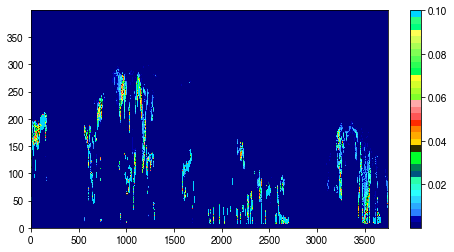

In [114]:
fig = mp.figure(figsize=(8,4))
ax = fig.add_subplot(111)
plot = ax.pcolormesh(gdal_tbc_data.T[::-1,:], vmin=1e-4, vmax=1e-1, cmap=calipso_cmap)

mp.colorbar(plot, norm=norm)

In [101]:
cbar = matplotlib.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,\
                                        boundaries=[0] + bounds + [2],\
                                        extend='both', ticks=bounds,\
                                        spacing='nonproportional',\
                                        orientation='vertical')



In [ ]:
ds

In [ ]:
avd_data.shape

In [ ]:
mp.pcolormesh(gdal_clf_data.T[::-1,:], cmap=cmap_partial, vmin=0, vmax=30); mp.colorbar()

In [ ]:
mp.pcolormesh(clf_data.T[::-1,:]/30, cmap=cmap_partial, vmin=0, vmax=30); mp.colorbar()

In [ ]:
# make color map
minval=0.2 # for inferno:  0.18
maxval=1 # for inferno: 1.0
n=256
full_cmap = mp.get_cmap('magma')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

In [ ]:
numpy.sum(gdal_tbc_data==-9999.)/gdal_tbc_data.size

In [ ]:
mp.pcolormesh(gdal_tbc_data.T[::-1,:], cmap=cmap_partial, vlmin=0, vmax=1.5); mp.colorbar()

In [ ]:
mp.pcolormesh(tbc_data.T[::-1,:], cmap=cmap_partial, vmin=0, vmax=1.5); mp.colorbar()

In [ ]:
lat_2d = numpy.repeat(lat[:,0], p_data.shape[1]).reshape((p_data.shape))

In [ ]:
fig = mp.figure(figsize=(8,6))

ax = fig.add_subplot(111)
plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     clf_data.T[::-1,:], vmin=0, vmax=1)

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)

In [ ]:
fig = mp.figure(figsize=(8,6))

ax = fig.add_subplot(111)
clevels = numpy.logspace(-4,-1)
# plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
#                      tbc_data.T[::-1,:], vmin=0, vmax=0.1)
plot = ax.contourf(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     tbc_data.T[::-1,:], levels=clevels, cmap='gist_ncar')

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)

In [ ]:
fig = mp.figure(figsize=(8,6))

ax = fig.add_subplot(111)
plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     rh_data.T[::-1,:], vmin=0, vmax=1)

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)

In [ ]:
fig = mp.figure(figsize=(8,6))

clevels = numpy.arange(0,1.01,0.05)
ax = fig.add_subplot(111)
plot = ax.contourf(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     rh_data.T[::-1,:], levels=clevels, cmap='magma')

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)